In [1]:
import os
import json
import re
import pandas as pd

def count_nodes_and_edges(mermaid_code):
    # Count nodes (anything inside square brackets)
    nodes = re.findall(r'\[.*?\]', mermaid_code)
    # Count edges (lines with arrows)
    edges = re.findall(r'-->', mermaid_code)
    return len(nodes), len(edges)

def process_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    equivalent = data.get('equivalent', False)
    num_iterations = data.get('num_iterations', 0)
    mermaid_code = data.get('final_mermaid_code', '')
    num_nodes, num_edges = count_nodes_and_edges(mermaid_code)
    return {
        'equivalent': equivalent,
        'num_iterations': num_iterations,
        'num_nodes': num_nodes,
        'num_edges': num_edges
    }

def process_directory(base_dir):
    records = []
    for sector in os.listdir(base_dir):
        sector_path = os.path.join(base_dir, sector)
        if os.path.isdir(sector_path):
            for activity in os.listdir(sector_path):
                activity_path = os.path.join(sector_path, activity)
                if os.path.isdir(activity_path):
                    json_file = os.path.join(activity_path, f"{activity}_bpmn_output.json")
                    if os.path.exists(json_file):
                        metrics = process_json_file(json_file)
                        if metrics['num_nodes'] > 20 or metrics['num_edges'] > 20:
                            print(f"{sector} - {activity} had {metrics['num_nodes']} nodes")
                            
                        if not metrics['equivalent']:
                            print(f"{sector} - {activity} was not equivalent")
                        records.append({
                            'sector': sector,
                            'activity': activity,
                            'equivalent': metrics['equivalent'],
                            'num_iterations': metrics['num_iterations'],
                            'num_nodes': metrics['num_nodes'],
                            'num_edges': metrics['num_edges']
                        })
    return pd.DataFrame(records)


TRAIN = False
# Set the base directory
ROOT_DIR = r"C:\Projects\Research\SWEEP\SWEEP"
base_directory = r"test\results\bpmn_generation\\" 
data_df = process_directory(os.path.join(ROOT_DIR, base_directory, "train" if TRAIN else "test"))

# Preview the DataFrame
print(data_df.head())


banking - credibility_check had 16 nodes
business - online_sale had 25 nodes
business - online_sale was not equivalent
customer_service - application_procedure had 15 nodes
customer_service - service_request had 26 nodes
customer_service - service_request was not equivalent
technology - ticket_system was not equivalent
     sector                 activity  equivalent  num_iterations  num_nodes  \
0   banking        credibility_check        True               3         16   
1   banking  loan_risk_assessment_v2        True               1         12   
2  business           bakery_process        True               4         18   
3  business          job_application        True               1         12   
4  business            leave_request        True               2         10   

   num_edges  
0         25  
1         12  
2         15  
3         14  
4         13  


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 160)

print(data_df)

              sector                 activity  equivalent  num_iterations  num_nodes  num_edges
0            banking        credibility_check        True               3         16         25
1            banking  loan_risk_assessment_v2        True               1         12         12
2           business           bakery_process        True               4         18         15
3           business          job_application        True               1         12         14
4           business            leave_request        True               2         10         13
5           business              online_sale       False               6         25         19
6           business     order_work_equipment        True               3         13         15
7   customer_service    application_procedure        True               1         15         21
8   customer_service      incident_management        True               1         11         11
9   customer_service            procure_

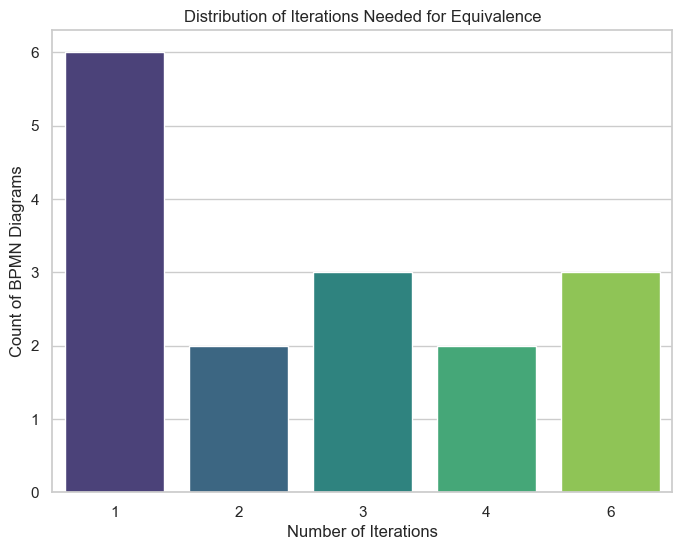

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='num_iterations', data=data_df, palette='viridis')
plt.title('Distribution of Iterations Needed for Equivalence')
plt.xlabel('Number of Iterations')
plt.ylabel('Count of BPMN Diagrams')
plt.show()


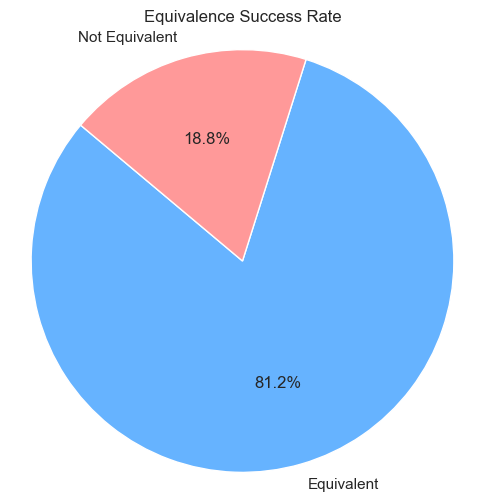

In [4]:
plt.figure(figsize=(6, 6))
equivalence_counts = data_df['equivalent'].value_counts()
plt.pie(equivalence_counts, labels=['Equivalent', 'Not Equivalent'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Equivalence Success Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\wmichele\AppData\Local\Temp\ipykernel_11760\2540258783.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


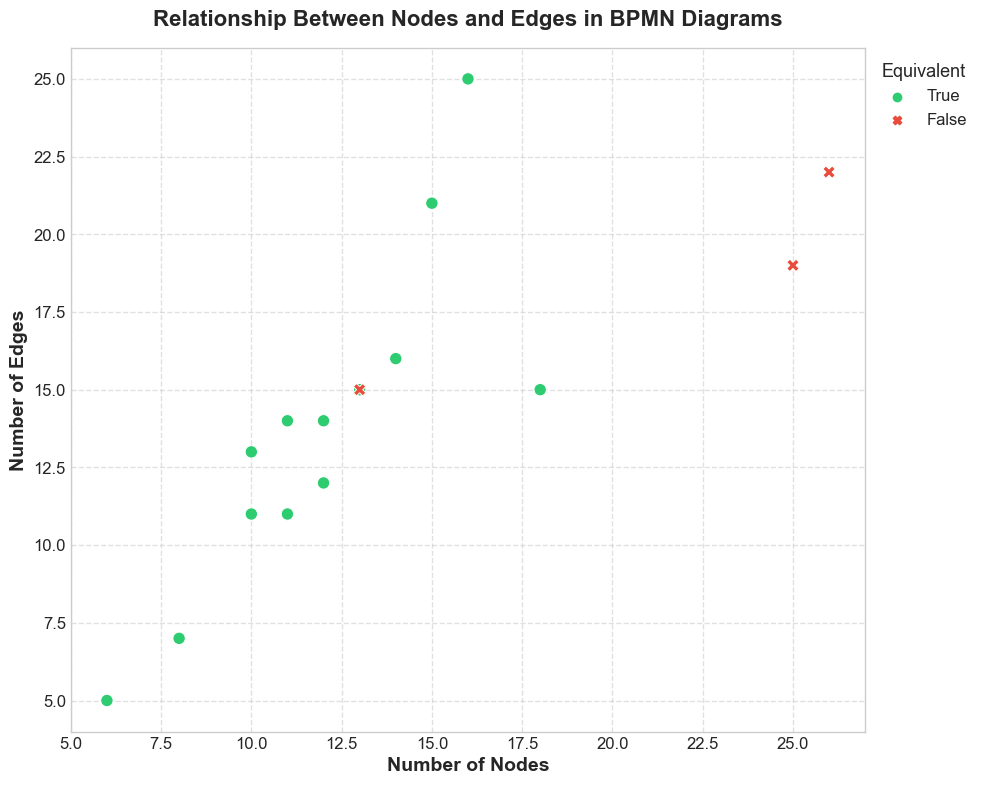

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set the style to a clean, professional look
plt.style.use('seaborn-whitegrid')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot with improved aesthetics and different markers
scatter = sns.scatterplot(x='num_nodes', y='num_edges', 
                          hue='equivalent', 
                          style='equivalent',  # Add style parameter
                          data=data_df, 
                          palette=['#e74c3c', '#2ecc71'],  # Professional color scheme
                          markers={True: 'o', False: 'X'},  # Circle for True, Square for False
                          s=80,  # Larger point size
                          ax=ax)

# Customize the plot
plt.title('Relationship Between Nodes and Edges in BPMN Diagrams', 
          fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Number of Nodes', fontsize=14, fontweight='bold')
plt.ylabel('Number of Edges', fontsize=14, fontweight='bold')

# Customize the legend
legend = plt.legend(title='Equivalent', title_fontsize='13', fontsize='12', 
                    loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontweight('bold')

# Flip the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Equivalent', 
          title_fontsize='13', fontsize='12', 
          loc='upper left', bbox_to_anchor=(1, 1))

# Improve tick label size and font
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a subtle grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent cutoff
plt.tight_layout()

plt.savefig(os.path.join(ROOT_DIR, "test/evaluation/bpmn_generation",'nodes_edges_equivalence_scatter.png'), dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\wmichele\AppData\Local\Temp\ipykernel_11760\3390551950.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


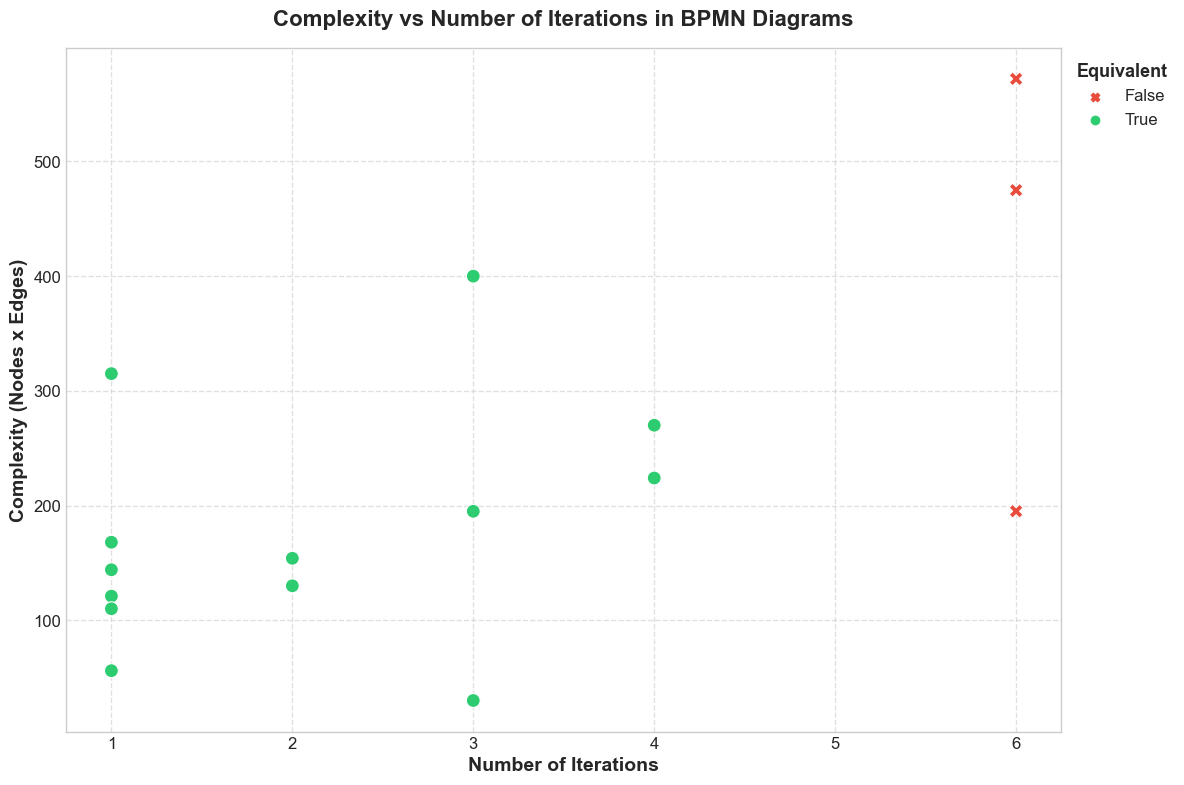

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Assuming data_df is your existing DataFrame
# Calculate complexity
data_df['complexity'] = data_df['num_nodes'] * data_df['num_edges']

# Set the style to a clean, professional look
plt.style.use('seaborn-whitegrid')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot
scatter = sns.scatterplot(x='num_iterations', y='complexity', 
                          hue='equivalent', 
                          style='equivalent',
                          data=data_df, 
                          palette=['#e74c3c', '#2ecc71'],  # Red for False, Green for True
                          markers={True: 'o', False: 'X'},  # Circle for True, Square for False
                          s=100,  # Larger point size
                          ax=ax)

# Customize the plot
plt.title('Complexity vs Number of Iterations in BPMN Diagrams', 
          fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Number of Iterations', fontsize=14, fontweight='bold')
plt.ylabel('Complexity (Nodes x Edges)', fontsize=14, fontweight='bold')

# Customize the legend
legend = plt.legend(title='Equivalent', title_fontsize='13', fontsize='12', 
                    loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontweight('bold')

# Improve tick label size and font
plt.tick_params(axis='both', which='major', labelsize=12)

# Set x-axis to show only integer values from 1 to 5
plt.xticks(range(1, 7))

# Add a subtle grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(ROOT_DIR, "test/evaluation/bpmn_generation", 'complexity_iterations_scatter.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

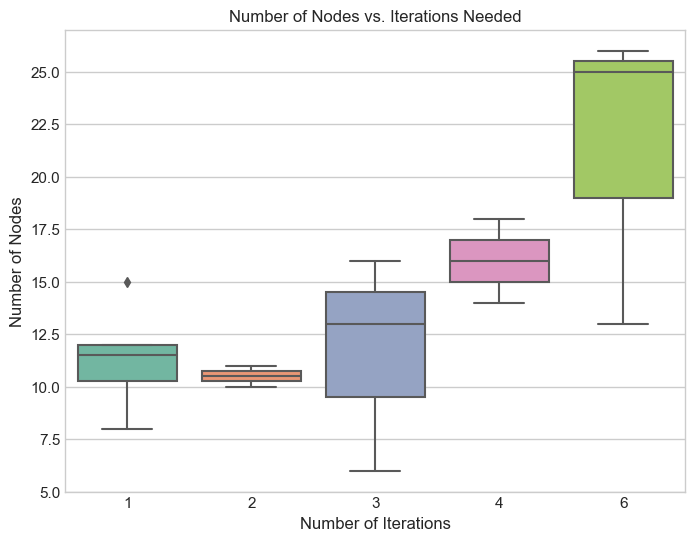

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_iterations', y='num_nodes', data=data_df, palette='Set2')
plt.title('Number of Nodes vs. Iterations Needed')
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Nodes')
plt.show()


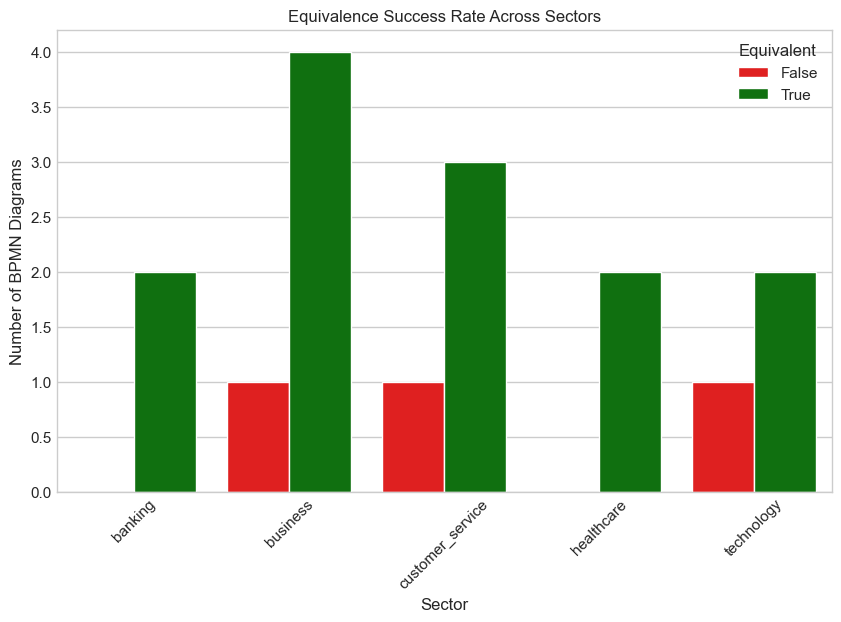

In [8]:
plt.figure(figsize=(10, 6))
sector_equivalence = data_df.groupby(['sector', 'equivalent']).size().reset_index(name='counts')
sns.barplot(x='sector', y='counts', hue='equivalent', data=sector_equivalence, palette=['red', 'green'])
plt.title('Equivalence Success Rate Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of BPMN Diagrams')
plt.legend(title='Equivalent')
plt.xticks(rotation=45)
plt.show()


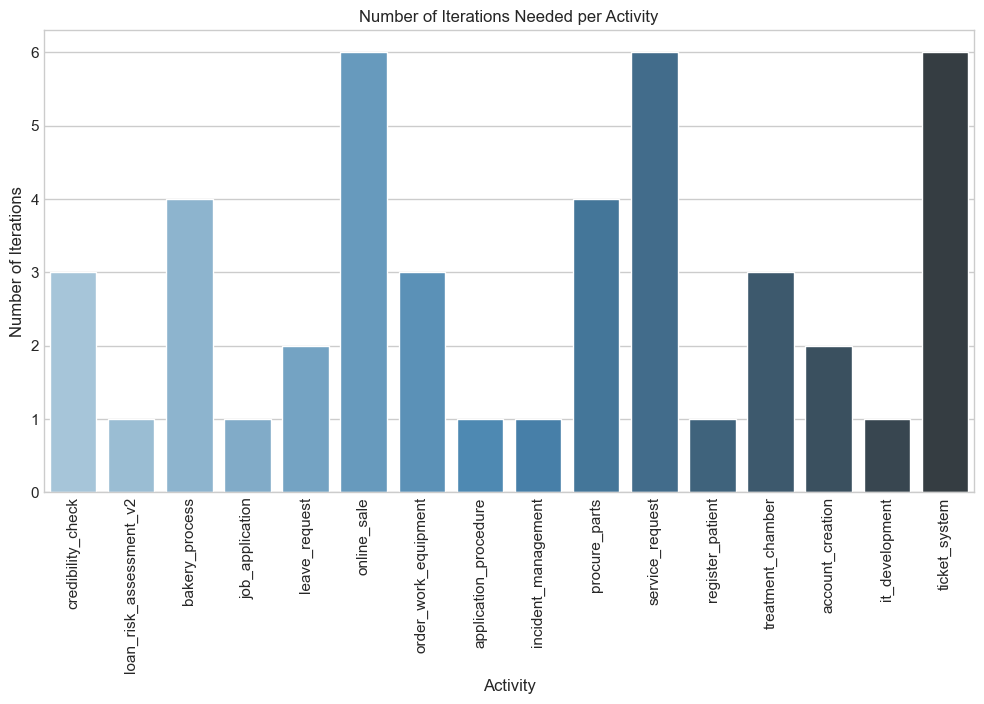

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='activity', y='num_iterations', data=data_df, palette='Blues_d')
plt.title('Number of Iterations Needed per Activity')
plt.xlabel('Activity')
plt.ylabel('Number of Iterations')
plt.xticks(rotation=90)
plt.show()


In [10]:
# General statistics
print(data_df.describe())

# Equivalence rates
equivalence_rate = data_df['equivalent'].mean() * 100
print(f"Overall Equivalence Rate: {equivalence_rate:.2f}%")


       num_iterations  num_nodes  num_edges  complexity
count       16.000000  16.000000  16.000000   16.000000
mean         2.812500  13.750000  14.687500  222.437500
std          1.905037   5.446712   5.237286  150.523074
min          1.000000   6.000000   5.000000   30.000000
25%          1.000000  10.750000  11.750000  127.750000
50%          2.500000  12.500000  14.500000  181.500000
75%          4.000000  15.250000  16.750000  281.250000
max          6.000000  26.000000  25.000000  572.000000
Overall Equivalence Rate: 81.25%
